In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
cd C:\\Users\\aryan\\OneDrive\\Documents\\DATA SCIENCE\\ML\\Classification

C:\Users\aryan\OneDrive\Documents\DATA SCIENCE\ML\Classification


In [6]:
df = pd.read_csv('New_ML_Classificatio.csv')
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)

In [7]:
df1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,bad,177,3,low,F,44,1233,yes
1,2,F,Flight,4,excellent,216,2,low,M,59,3088,yes
2,3,A,Flight,2,bad,183,4,low,M,48,3374,yes
3,4,B,Flight,3,ok,176,4,medium,M,10,1177,yes
4,5,C,Flight,2,bad,184,3,medium,F,46,2484,yes


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  object
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


In [9]:
df1.describe()

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,310.000000,10.000000,65.000000,7846.000000


In [6]:
df1.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
num = df1.select_dtypes(include = 'number')
cat = df1.select_dtypes(include = 'object')

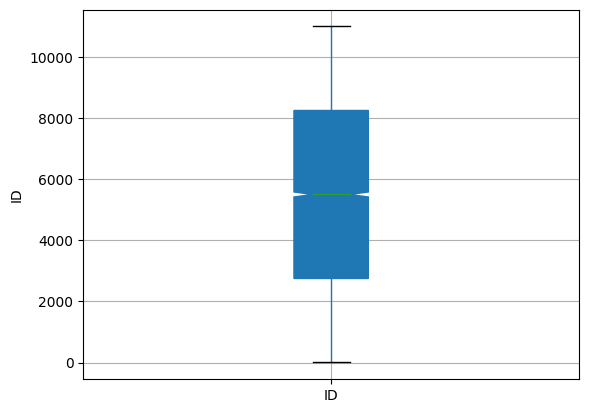

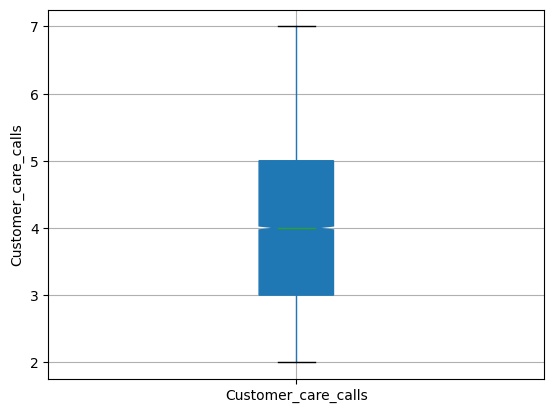

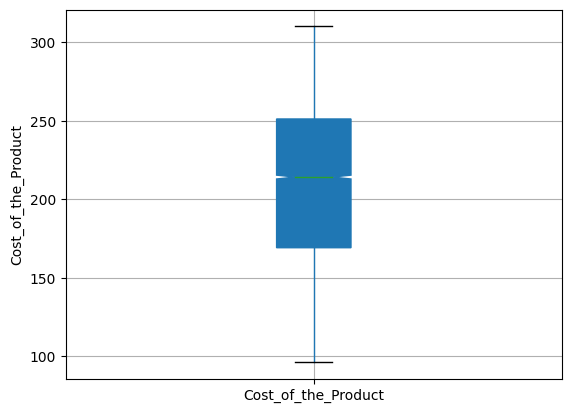

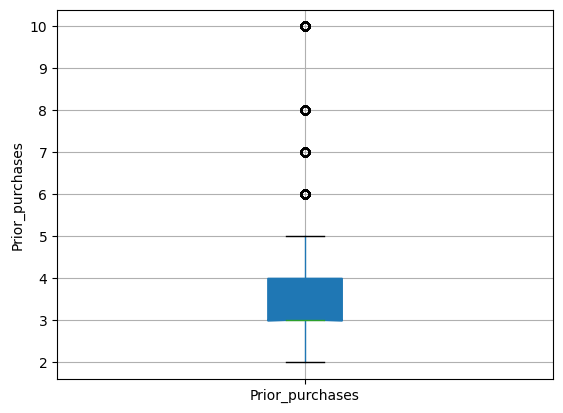

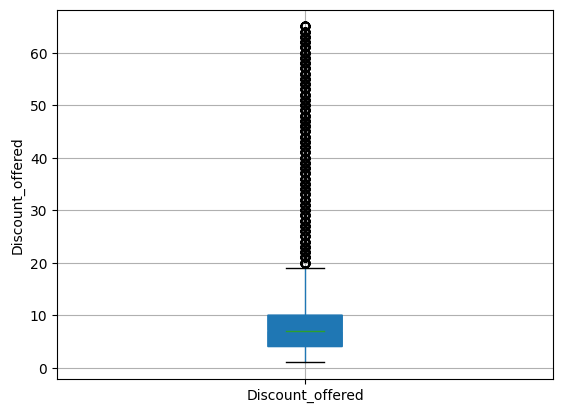

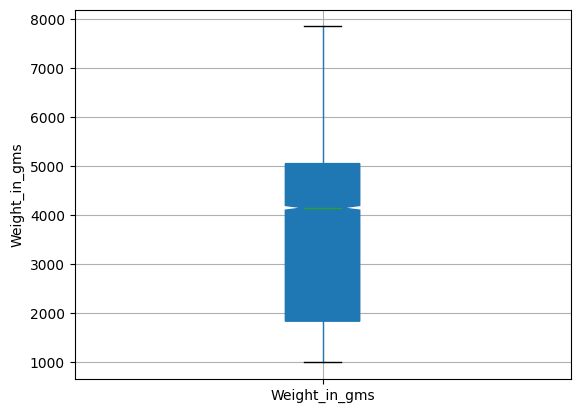

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in num:
  num.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

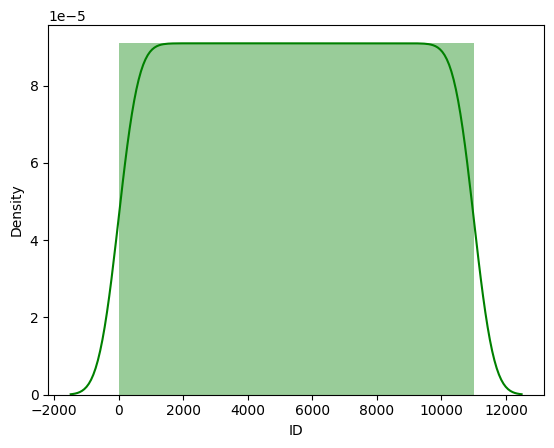

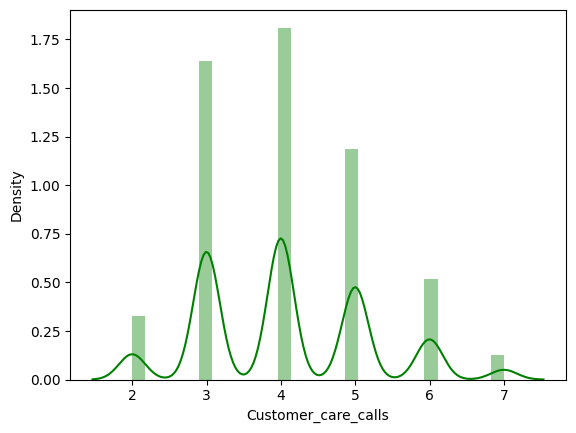

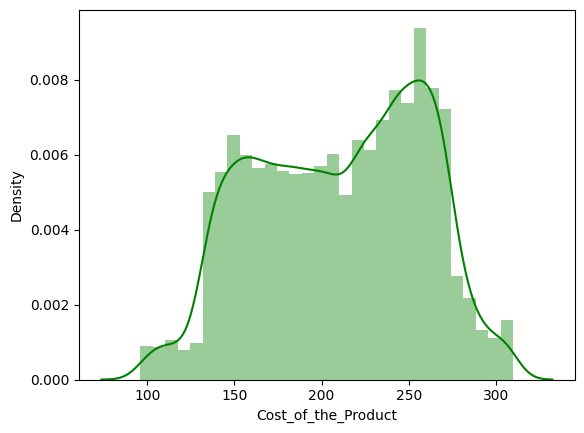

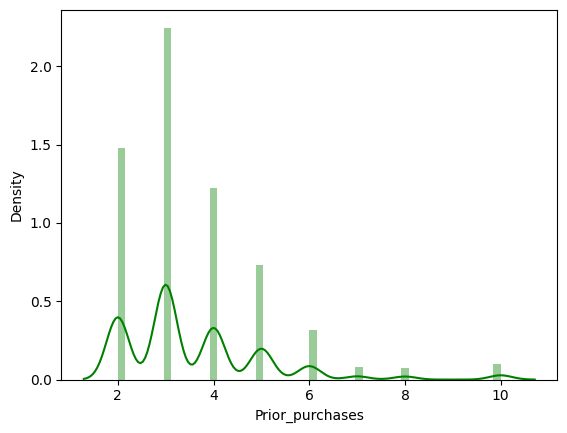

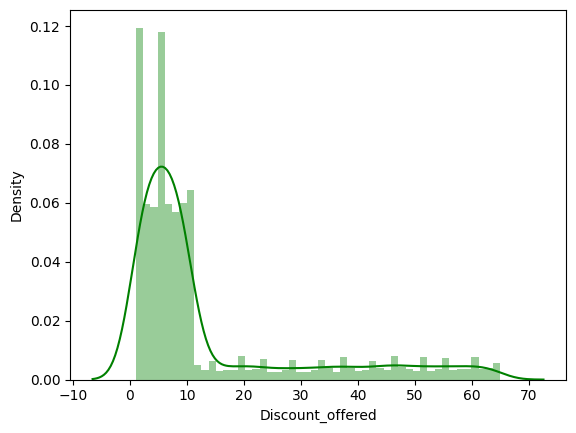

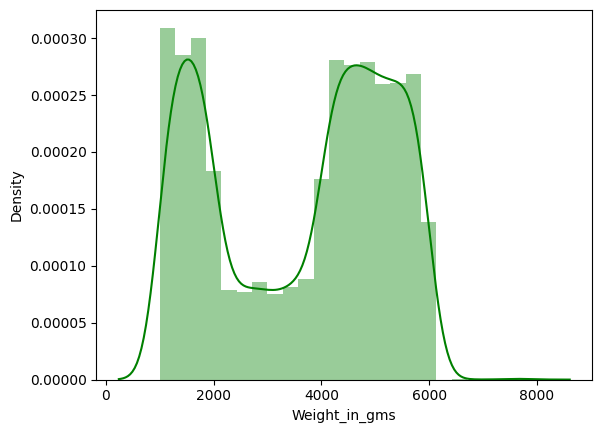

In [9]:
for i in num:
  sns.distplot(df1[i], kde = True, color = 'green')
  plt.show()

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

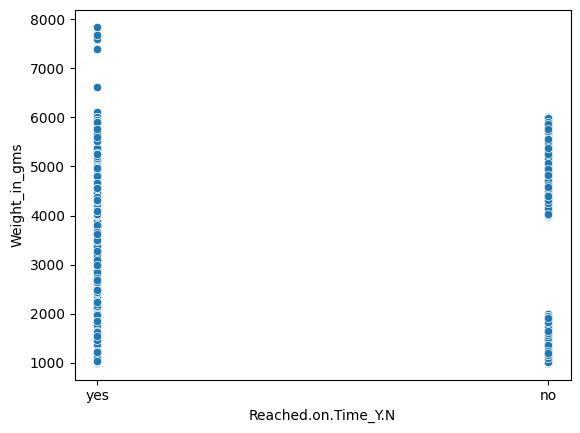

In [10]:
sns.scatterplot(x = df1['Reached.on.Time_Y.N'], y = df1['Weight_in_gms'], palette = 'pastel')

In [11]:
# for i in num:
#   sns.scatterplot(x = df1['Reached.on.Time_Y.N'], y = df1[i], palette = 'pastel')
#   plt.show()

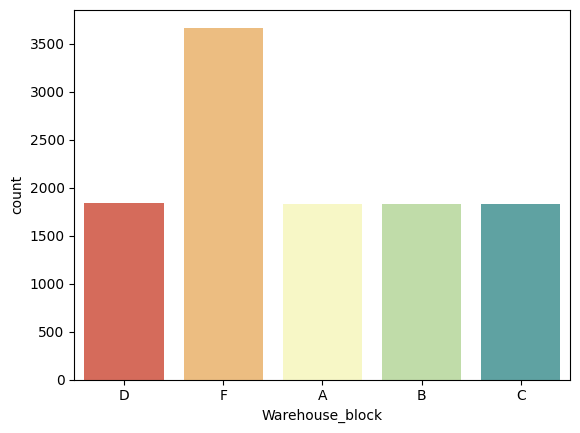

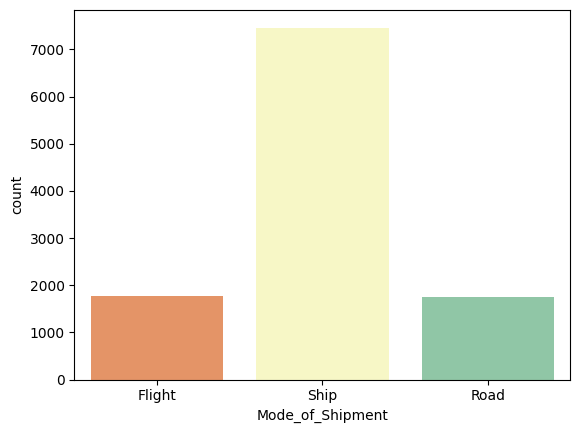

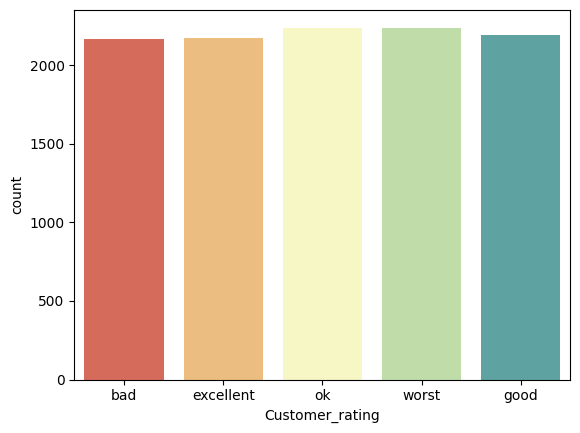

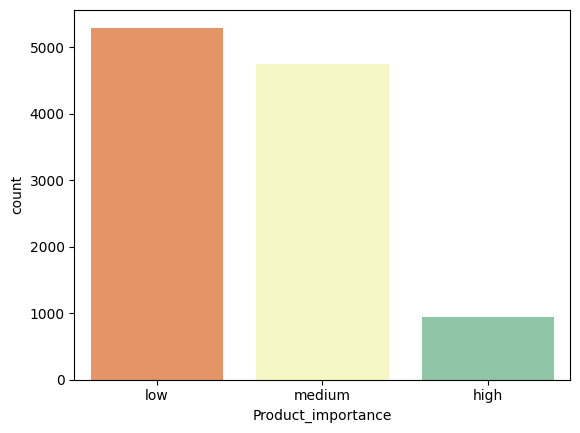

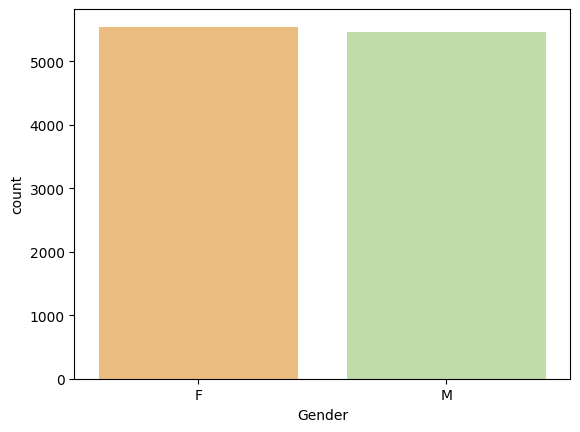

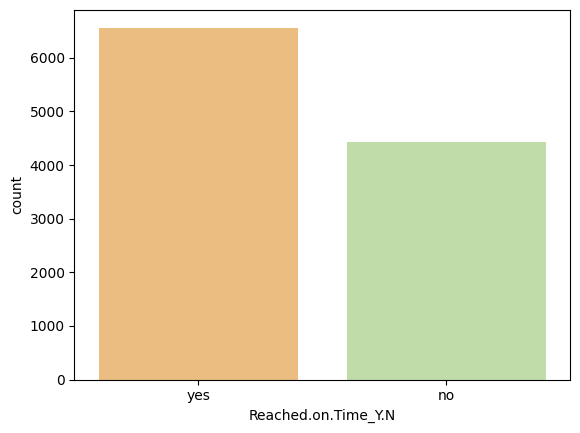

In [12]:
for i in cat:
  sns.countplot(x = df1[i], palette = 'Spectral')
  plt.show()

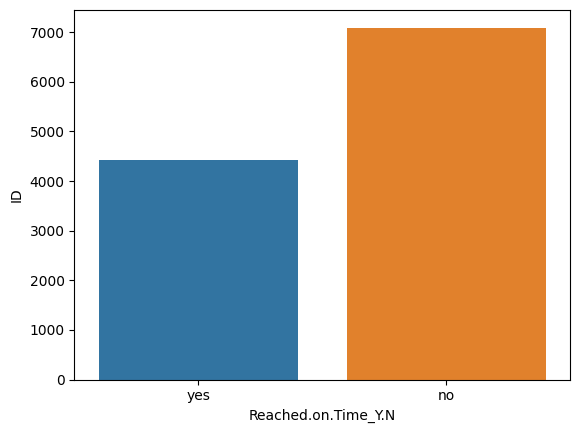

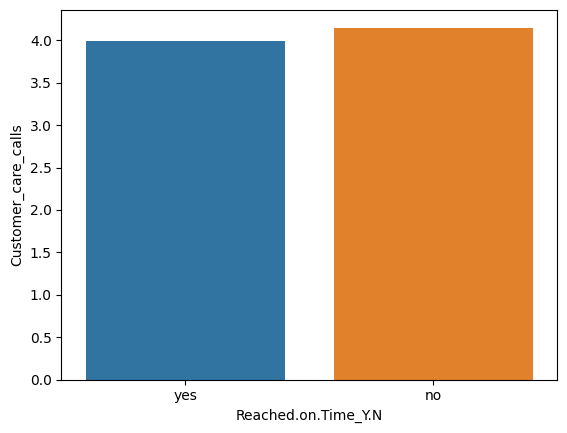

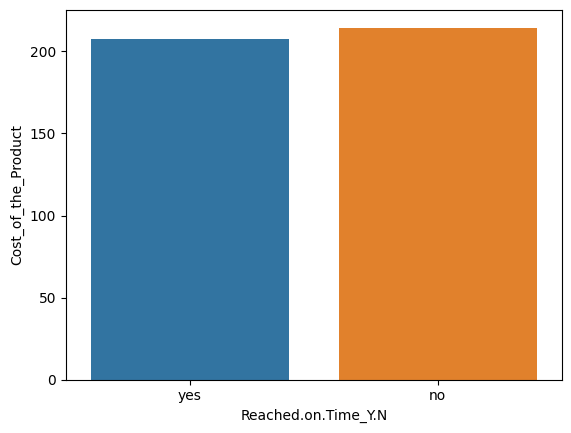

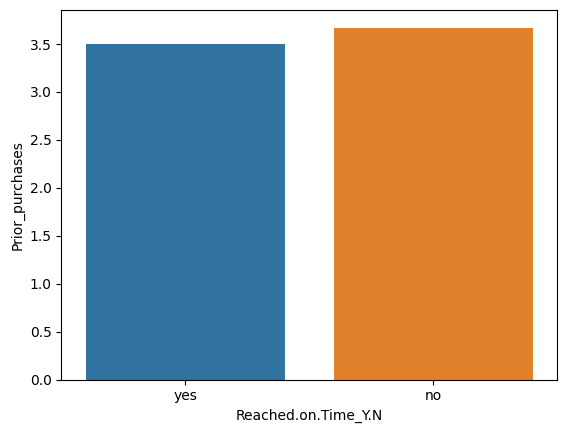

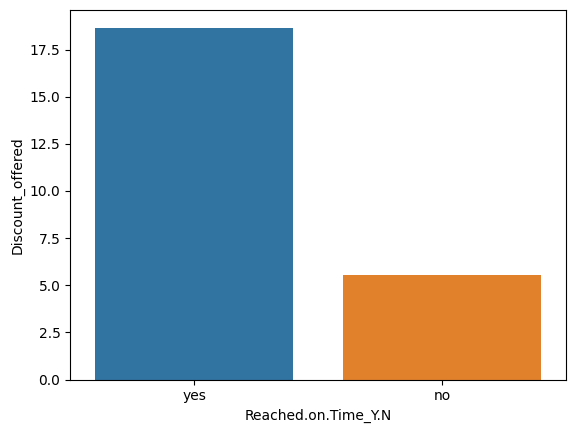

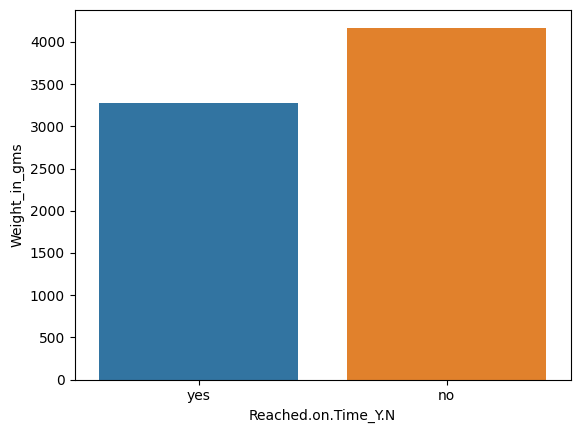

In [13]:
for i in num:
  sns.barplot(x = df1['Reached.on.Time_Y.N'], y = df1[i], ci = 0)
  plt.show()

In [14]:
df1[df1.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [15]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [16]:
df1[df1.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [17]:
x = df1.drop(['Reached.on.Time_Y.N'], axis = 1)
y = df1['Reached.on.Time_Y.N']

In [18]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 69, stratify = y)

In [19]:
train_num = train_x.select_dtypes(include = 'number')
train_cat = train_x.select_dtypes(include = 'object')

test_num = test_x.select_dtypes(include = 'number')
test_cat = test_x.select_dtypes(include = 'object')

In [20]:
print('Missing values before imputation \n', train_cat.isnull().sum())
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat.isnull().sum())

Missing values before imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


In [21]:
print('Missing values before imputation \n', train_num.isnull().sum())
train_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num.isnull().sum())

Missing values before imputation 
 ID                     0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 ID                     0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [22]:
print('Missing values before imputation \n', test_cat.isnull().sum())
test_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat.isnull().sum())

Missing values before imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


In [23]:
print('Missing values before imputation \n', test_num.isnull().sum())
test_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num.isnull().sum())

Missing values before imputation 
 ID                     0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 ID                     0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train_y)
train_y = enc.transform(train_y)
test_y = enc.transform(test_y)

In [25]:
# np.unique(df1['employee_residence'])
# np.unique(df1['experience_level'])

In [26]:
train_cat.head(25)

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
5631,B,Flight,bad,medium,M
919,F,Ship,bad,medium,M
5662,C,Ship,bad,low,M
2205,B,Flight,bad,medium,M
1387,F,Ship,good,medium,M
6226,C,Ship,good,low,M
2750,A,Flight,excellent,high,M
9131,F,Ship,ok,low,F
7266,D,Flight,excellent,medium,M
6837,B,Road,ok,medium,M


In [27]:
np.unique(train_cat['Product_importance'])

array(['high', 'low', 'medium'], dtype=object)

In [28]:
train_cat.head(25)

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
5631,B,Flight,bad,medium,M
919,F,Ship,bad,medium,M
5662,C,Ship,bad,low,M
2205,B,Flight,bad,medium,M
1387,F,Ship,good,medium,M
6226,C,Ship,good,low,M
2750,A,Flight,excellent,high,M
9131,F,Ship,ok,low,F
7266,D,Flight,excellent,medium,M
6837,B,Road,ok,medium,M


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent']])
train_cat['Customer_rating'] = ordinal.fit_transform(train_cat[['Customer_rating']])
test_cat['Customer_rating'] = ordinal.transform(test_cat[['Customer_rating']])

# ordinal = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent'], ['low', 'medium', 'high']])
# ordinal.fit(train_cat[['Customer_rating', 'Product_importance']])
# train_cat[['Customer_rating', 'Product_importance']] = ordinal.transform(train_cat[['Customer_rating', 'Product_importance']])
# test_cat[['Customer_rating', 'Product_importance']] = ordinal.transform(test_cat[['Customer_rating', 'Product_importance']])

In [30]:
train_cat.head(25)

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
5631,B,Flight,1.0,medium,M
919,F,Ship,1.0,medium,M
5662,C,Ship,1.0,low,M
2205,B,Flight,1.0,medium,M
1387,F,Ship,3.0,medium,M
6226,C,Ship,3.0,low,M
2750,A,Flight,4.0,high,M
9131,F,Ship,2.0,low,F
7266,D,Flight,4.0,medium,M
6837,B,Road,2.0,medium,M


In [31]:
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

In [32]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
ohe.fit(train_cat)
train_cat = pd.DataFrame(ohe.transform(train_cat), columns = ohe.get_feature_names_out())
test_cat = pd.DataFrame(ohe.transform(test_cat), columns = ohe.get_feature_names_out())


In [33]:
train_x1 = pd.concat([train_num, train_cat], axis = 1)
test_x1 = pd.concat([test_num, test_cat], axis = 1) 

In [34]:
train_x1

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_rating_0.0,Customer_rating_1.0,Customer_rating_2.0,Customer_rating_3.0,Customer_rating_4.0,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,5632,6,256,3,1,4435,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,920,3,160,10,25,1548,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,5663,4,237,3,2,5277,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2206,6,229,3,13,2322,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1388,4,161,2,59,1941,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,10513,4,226,2,10,4706,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8795,7044,4,135,3,3,4760,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8796,8694,6,164,4,6,5264,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8797,7280,4,209,2,3,4407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

In [36]:
train_x1

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_rating_0.0,Customer_rating_1.0,Customer_rating_2.0,Customer_rating_3.0,Customer_rating_4.0,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.512002,0.8,0.747664,0.125,0.000000,0.501680,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.083561,0.2,0.299065,1.000,0.375000,0.079912,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.514821,0.4,0.658879,0.125,0.015625,0.624690,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.200491,0.8,0.621495,0.125,0.187500,0.192988,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.126114,0.4,0.303738,0.000,0.906250,0.137327,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,0.955810,0.4,0.607477,0.000,0.140625,0.541271,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8795,0.640389,0.4,0.182243,0.125,0.031250,0.549160,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8796,0.790416,0.8,0.317757,0.250,0.078125,0.622790,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8797,0.661848,0.4,0.528037,0.000,0.031250,0.497589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [37]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()
model5 = SVC()
model6 = xgb.XGBClassifier()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

model1.fit(train_x1, train_y)
pred1 = model1.predict(test_x1)

c_matrix1 = confusion_matrix(test_y, pred1)
acc1 = accuracy_score(test_y, pred1)

print('confusion matrix is: \n', c_matrix1, '\n', 'and accuracy is: \n', acc1)

confusion matrix is: 
 [[563 324]
 [415 898]] 
 and accuracy is: 
 0.6640909090909091


In [42]:
model2.fit(train_x1, train_y)
pred2 = model2.predict(test_x1)

c_matrix2 = confusion_matrix(test_y, pred2)
acc2 = accuracy_score(test_y, pred2)

print('confusion matrix is: \n', c_matrix2, 'and accuracy is: \n', acc2)

confusion matrix is: 
 [[501 386]
 [402 911]] and accuracy is: 
 0.6418181818181818


In [43]:
model3.fit(train_x1, train_y)
pred3 = model3.predict(test_x1)

c_matrix3 = confusion_matrix(test_y, pred3)
acc3 = accuracy_score(test_y, pred3)

print('confusion matrix is: \n', c_matrix3, 'and accuracy is: \n', acc3)

confusion matrix is: 
 [[678 209]
 [524 789]] and accuracy is: 
 0.6668181818181819


In [44]:
model4.fit(train_x1, train_y)
pred4 = model4.predict(test_x1)

c_matrix4 = confusion_matrix(test_y, pred4)
acc4 = accuracy_score(test_y, pred4)

print('confusion matrix is: \n', c_matrix4, 'and accuracy is: \n', acc4)

confusion matrix is: 
 [[512 375]
 [417 896]] and accuracy is: 
 0.64


In [45]:
model5.fit(train_x1, train_y)
pred5 = model5.predict(test_x1)

c_matrix5 = confusion_matrix(test_y, pred5)
acc5 = accuracy_score(test_y, pred5)

print('confusion matrix is: \n', c_matrix5, 'and accuracy is: \n', acc5)

confusion matrix is: 
 [[728 159]
 [568 745]] and accuracy is: 
 0.6695454545454546


In [46]:
model6.fit(train_x1, train_y)
pred6 = model6.predict(test_x1)

c_matrix6 = confusion_matrix(test_y, pred6)
acc6 = accuracy_score(test_y, pred6)

print('confusion matrix is: \n', c_matrix6, 'and accuracy is: \n', acc6)

confusion matrix is: 
 [[573 314]
 [457 856]] and accuracy is: 
 0.6495454545454545


In [47]:
from sklearn.model_selection import GridSearchCV

DTC_params = [{'criterion': ['gini', 'entropy'], 'max_depth': [3, 6, 9]}]

dtc = GridSearchCV(model2, DTC_params, cv = 5, scoring='accuracy')
dtc.fit(train_x1, train_y)

print(dtc.best_params_)
print((dtc.best_score_))

{'criterion': 'gini', 'max_depth': 3}
0.6872369373094216


In [50]:
RFC_params = [{'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 6, 9, 12, 15]}]

rfc = GridSearchCV(model3, RFC_params, cv = 5, scoring='accuracy')
rfc.fit(train_x1, train_y)

print(rfc.best_params_)
print((rfc.best_score_))

{'max_depth': 6, 'n_estimators': 100}
0.6875774587833996


In [51]:
KNC_params = [{'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}]

knc = GridSearchCV(model4, KNC_params, cv = 5, scoring='accuracy')
knc.fit(train_x1, train_y)

print(knc.best_params_)
print((knc.best_score_))

{'n_neighbors': 10, 'weights': 'distance'}
0.6358680681172154


In [52]:
SVC_params = [{'C': [0.1, 0.2, 0.3, 0.4], 'kernel': ['linear', 'poly', 'rbf']}]

svc = GridSearchCV(model5, SVC_params, cv = 5, scoring='accuracy')
svc.fit(train_x1, train_y)

print(svc.best_params_)
print((svc.best_score_))

{'C': 0.4, 'kernel': 'rbf'}
0.6709840947852601


In [53]:
XGBC_params = [{'eta': [0.1, 0.2, 0.3], 'n_estimators' : [10, 50, 100], 'max_depth': [3, 6, 9]}]

xgbc = GridSearchCV(model6, XGBC_params, cv = 5, scoring='accuracy')
xgbc.fit(train_x1, train_y)

print(xgbc.best_params_)
print((xgbc.best_score_))

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 10}
0.6906460928213345


In [54]:
nan_feat = [cname for cname in df2.columns if df2[cname].isnull().sum() >= 1]

# TO FIND OUT THE % OF NAN 
for i in nan_feat:
    print(i, np.round(df2[i].isnull().mean(), 2))

In [56]:
cat_data = df2.select_dtypes(include = 'object')
pd.crosstab(cat_data['Warehouse_block'], columns = 'counts', normalize = True)

col_0,counts
Warehouse_block,
A,0.166652
B,0.166652
C,0.166652
D,0.166742
F,0.333303


In [57]:
list1 = []
for i in cat_data.columns:
    list1.append((i, pd.crosstab(cat_data[i], columns = 'counts', normalize = True)))

In [58]:
list1

[('Warehouse_block',
  col_0              counts
  Warehouse_block          
  A                0.166652
  B                0.166652
  C                0.166652
  D                0.166742
  F                0.333303),
 ('Mode_of_Shipment',
  col_0               counts
  Mode_of_Shipment          
  Flight            0.161560
  Road              0.160015
  Ship              0.678425),
 ('Customer_rating',
  col_0              counts
  Customer_rating          
  bad              0.196836
  excellent        0.197382
  good             0.199018
  ok               0.203564
  worst            0.203200),
 ('Product_importance',
  col_0                 counts
  Product_importance          
  high                0.086190
  low                 0.481589
  medium              0.432221),
 ('Gender',
  col_0     counts
  Gender          
  F       0.504137
  M       0.495863),
 ('Reached.on.Time_Y.N',
  col_0                  counts
  Reached.on.Time_Y.N          
  no                   0.403309
 

In [59]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
ID,1.000000,0.188998,0.196791,0.145369,-0.598278,0.278312
Customer_care_calls,0.188998,1.000000,0.323182,0.180771,-0.130750,-0.276615
Cost_of_the_Product,0.196791,0.323182,1.000000,0.123676,-0.138312,-0.132604
Prior_purchases,0.145369,0.180771,0.123676,1.000000,-0.082769,-0.168213
Discount_offered,-0.598278,-0.130750,-0.138312,-0.082769,1.000000,-0.376067
Weight_in_gms,0.278312,-0.276615,-0.132604,-0.168213,-0.376067,1.000000


In [60]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func = chi2, k = 10)
selector.fit(train_x1, train_y)
train_x1.columns[selector.get_support()]

Index(['ID', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Warehouse_block_A',
       'Customer_rating_0.0', 'Customer_rating_4.0',
       'Product_importance_high'],
      dtype='object')

In [61]:
rf_model = RandomForestClassifier(random_state=69)

rf_model.fit(train_x1, train_y)

RandomForestClassifier(random_state=69)

In [62]:
feature_scores = pd.Series(rf_model.feature_importances_, index=train_x1.columns).sort_values(ascending=False)

In [63]:
feature_scores[:10]

ID                        0.238266
Weight_in_gms             0.187576
Discount_offered          0.153619
Cost_of_the_Product       0.124021
Prior_purchases           0.049496
Customer_care_calls       0.044441
Warehouse_block_F         0.013938
Mode_of_Shipment_Ship     0.012835
Customer_rating_3.0       0.012071
Product_importance_low    0.011773
dtype: float64

In [64]:
feature_scores.index[:10]

Index(['ID', 'Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product',
       'Prior_purchases', 'Customer_care_calls', 'Warehouse_block_F',
       'Mode_of_Shipment_Ship', 'Customer_rating_3.0',
       'Product_importance_low'],
      dtype='object')

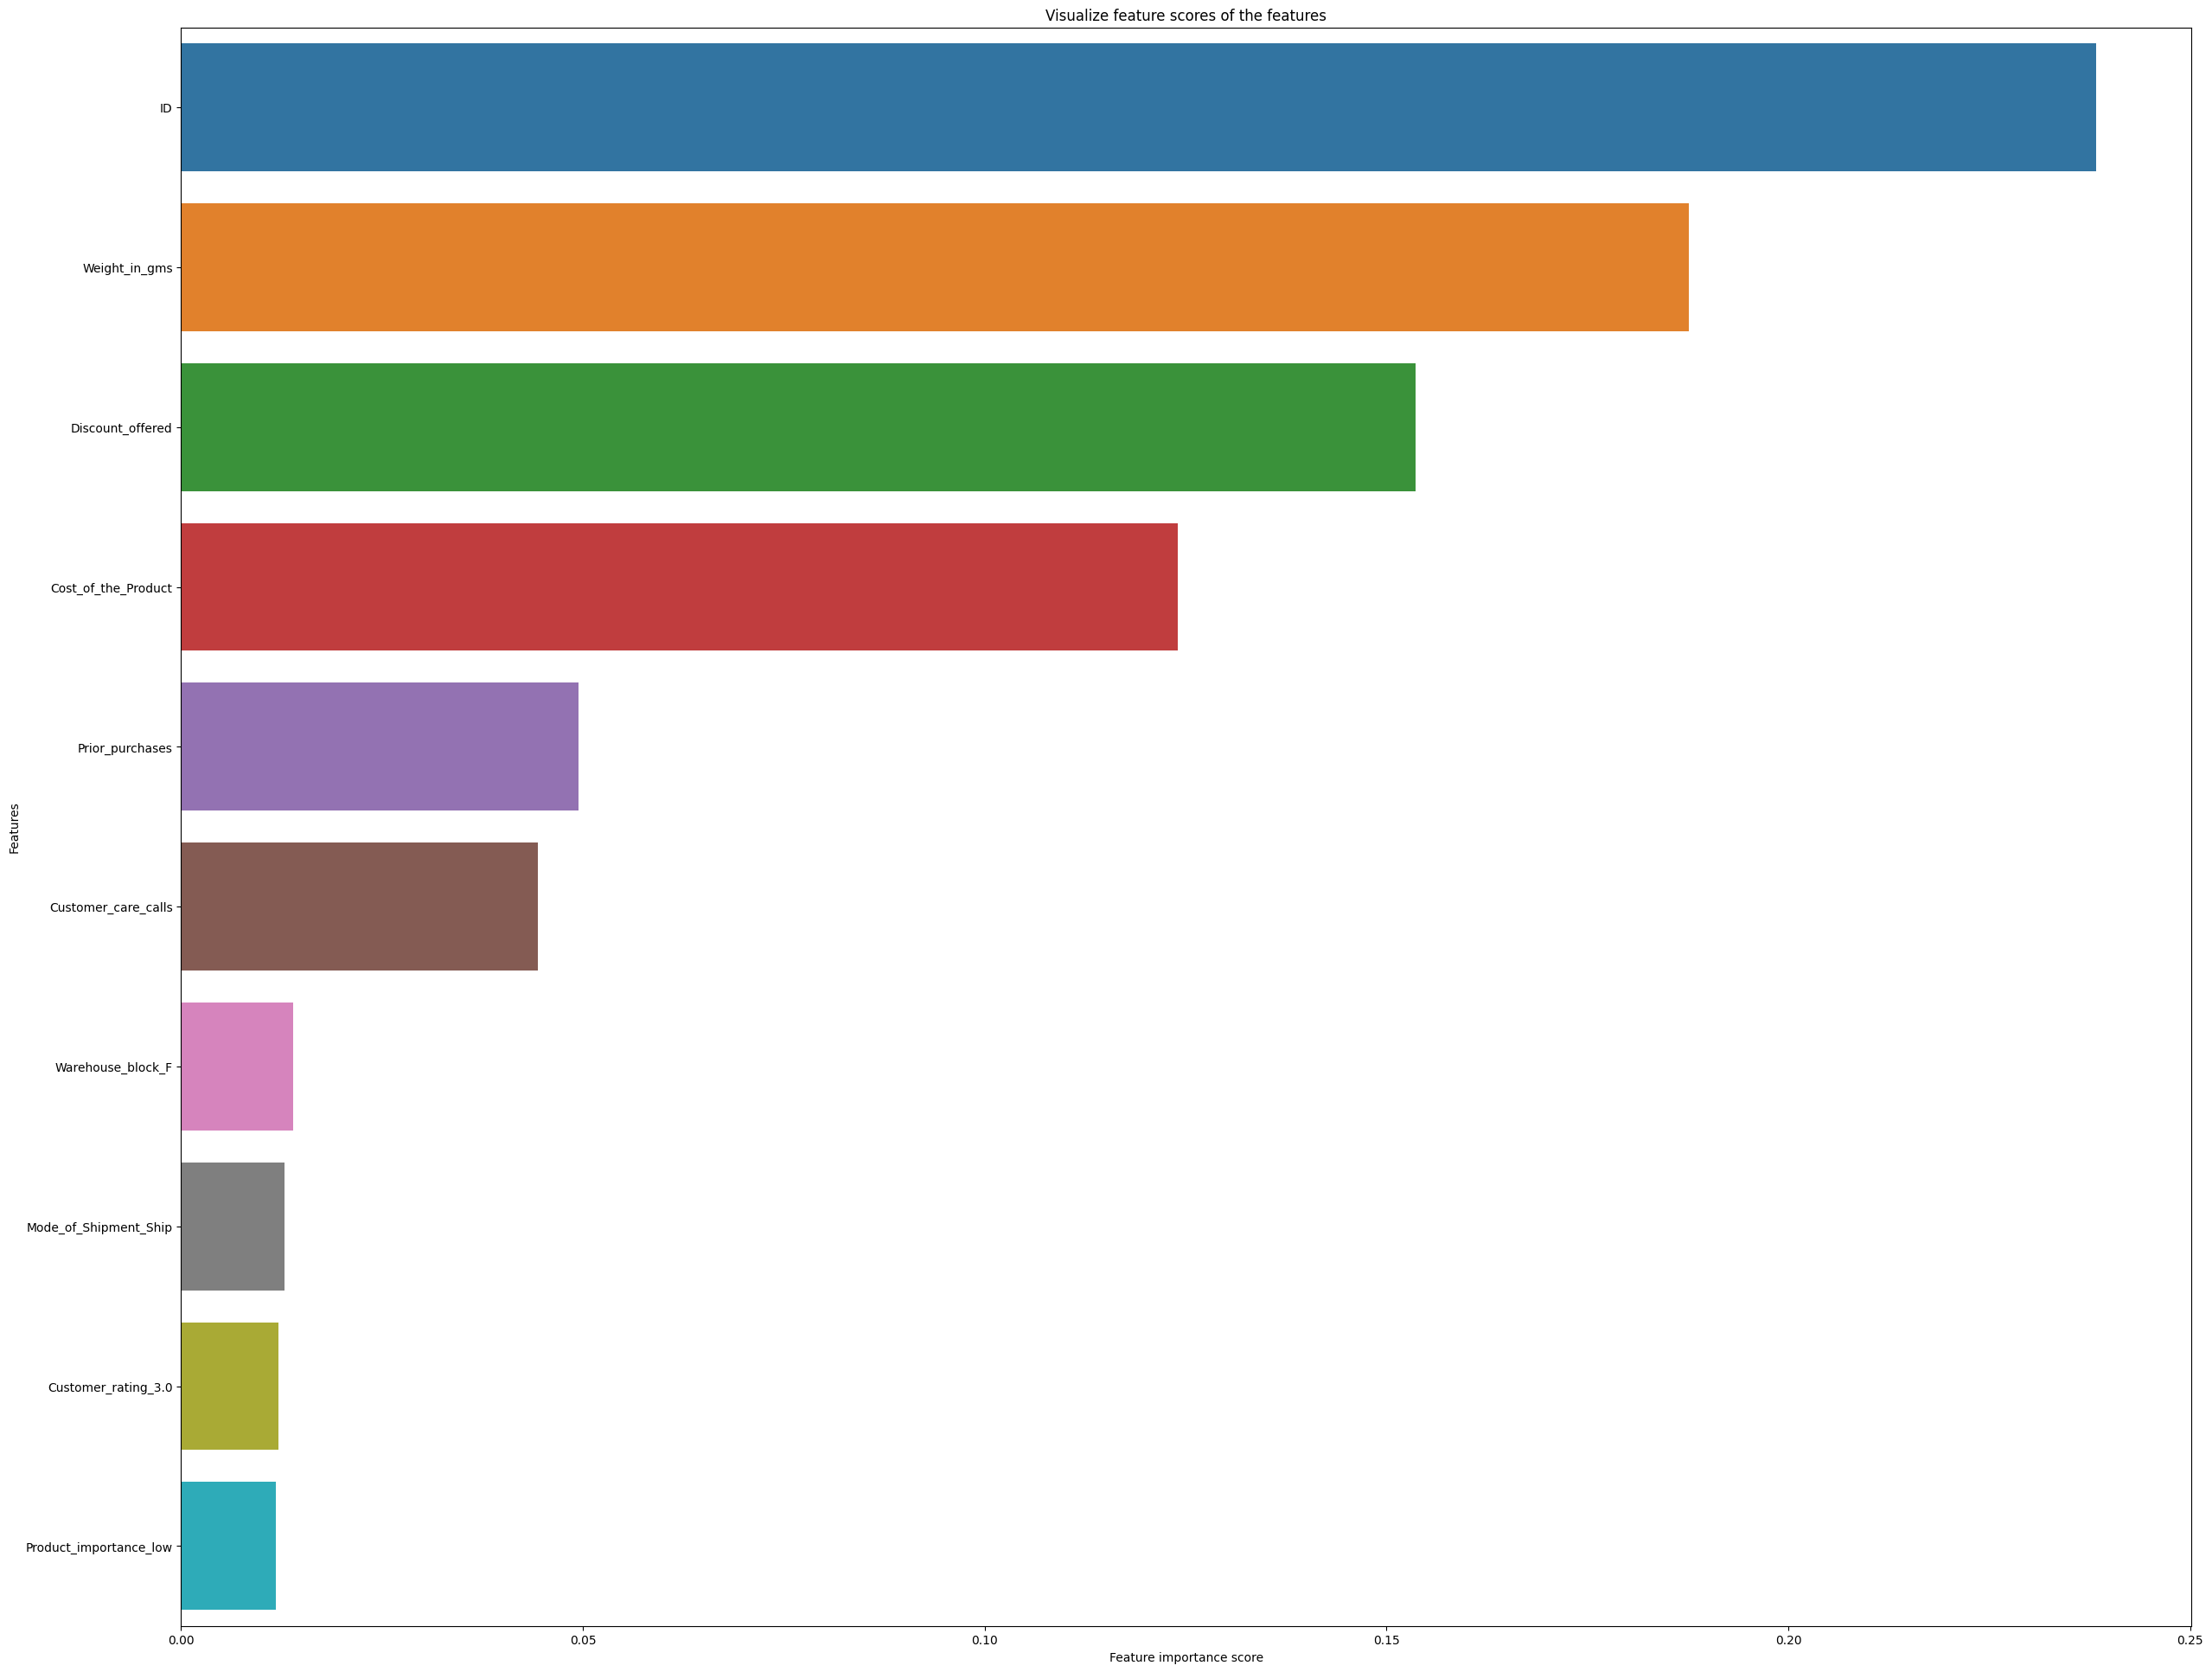

In [65]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
low_var_list = ['Alley', 'YrSold', 'PoolQC', 'MiscFeature', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'MoSold', 
            '1stFlrSF', '2ndFlrSF', 'LotArea', 'YearRemodAdd', 'Street', 'Utilities', 'LandSlope', 
            'Condition2', 'RoofMatl', 'Heating', 'GarageCond']
df2.drop(low_var_list, axis = 1, inplace = True)

In [ ]:
x1 = df2.drop(['SalePrice'], axis = 1)
y1 = df2['SalePrice']

In [ ]:
train_x4, test_x4, train_y4, test_y4 = train_test_split(x1, y1, random_state = 69)

In [ ]:
train_num1 = train_x4.select_dtypes(include = 'number')
train_cat1 = train_x4.select_dtypes(include = 'object')

test_num1 = test_x4.select_dtypes(include = 'number')
test_cat1 = test_x4.select_dtypes(include = 'object')

In [ ]:
print('Missing values before imputation \n', train_num1.isnull().sum())
train_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num1.isnull().sum())

In [ ]:
print('Missing values before imputation \n', train_cat1.isnull().sum())
train_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat1.isnull().sum())

In [ ]:
print('Missing values before imputation \n', test_cat1.isnull().sum())
test_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat1.isnull().sum())


In [ ]:
print('Missing values before imputation \n', test_num1.isnull().sum())
test_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num1.isnull().sum())

In [ ]:
train_num1.reset_index(inplace = True, drop = True)
train_cat1.reset_index(inplace = True, drop = True)
test_num1.reset_index(inplace = True, drop = True)
test_cat1.reset_index(inplace = True, drop = True)

In [ ]:
train_x5 = pd.concat([train_num1, train_cat1], axis = 1)
test_x5 = pd.concat([test_num1, test_cat1], axis = 1) 

In [ ]:
encoder1 = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder1.fit(train_x5)
train_x5 = pd.DataFrame(encoder1.transform(train_x5), columns = encoder1.get_feature_names_out())
test_x5 = pd.DataFrame(encoder1.transform(test_x5), columns = encoder1.get_feature_names_out())

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(train_x5)
train_x5 = pd.DataFrame(scaler1.transform(train_x5), columns = train_x5.columns)
test_x5 = pd.DataFrame(scaler1.transform(test_x5), columns = test_x5.columns)

In [ ]:
model7 = LogisticRegression()
model8 = DecisionTreeClassifier(random_state = 69)
model9 = RandomForestClassifier(random_state = 69)
model10 = KNeighborsClassifier()
model11 = xgb.XGBClassifier()

***Linear Regression***

In [ ]:
model7.fit(train_x5, train_y4)
pred7 = model7.predict(test_x5)

In [ ]:
# mae7 = mean_absolute_error(test_y4, pred7)
c_matrix7 = confusion_matrix(test_y4, pred7)

In [ ]:
c_matrix7

In [ ]:
model8.fit(train_x5, train_y4)
pred8 = model8.predict(test_x5)

mae8 = mean_absolute_error(test_y4, pred8)

mae8

In [ ]:
model9.fit(train_x5, train_y4)
pred9 = model9.predict(test_x5)

mae9 = mean_absolute_error(test_y4, pred9)

mae9

In [ ]:
model10.fit(train_x5, train_y4)
pred10 = model10.predict(test_x5)

mae10 = mean_absolute_error(test_y4, pred10)

mae10

In [ ]:
model11.fit(train_x5, train_y4)
pred11 = model11.predict(test_x5)

mae11 = mean_absolute_error(test_y4, pred11)

mae11